In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.utils.multiclass import unique_labels
# import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

import plotly.express as px

#os.chdir(r'N:\STOCK ADVISOR BOT')

In [9]:
index = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']

Weight_Pred7= [0.5443005143559108, 0.003008852417412, 0.0098887266688143, 0.0233622627380626, 0.4022363460926285, 0.0, 0.0, 0.0, 0.0172032977271719, 0.0]
Weight_Pred6= [0.7185495863758345, 0.0, 0.0, 0.0, 0.2814504136241656, 0.0, 0.0, 0.0, 0.0, 0.0]
Weight_Pred5= [0,0,0,0,0,0,0,0,0,0]

Weight_Pred4= [0.5729859253232473, 0.0, 0.4270140746767525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Weight_Pred3= [0.1277415750507625, 0.0, 0.2102703942407445, 0.0, 0.1978039853044366, 0.0096087949623119, 0.0114532986888629, 0.0, 0.4431219517528815, 0.0]
Weight_Pred2= [0.0, 0.058459195854336, 0.0763555979655233, 0.0, 0.8651852061801407, 0.0, 0.0, 0.0, 0.0, 0.0]
Weight_Pred1= [0.4756688788448108, 0.0, 0.0, 0.0, 0.1328426283532313, 0.322760518536026, 0.068727974265932, 0.0, 0.0, 0.0]

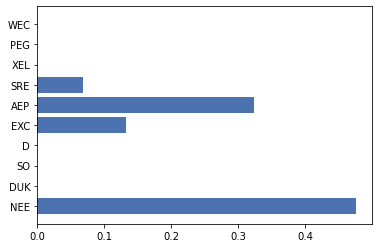

In [28]:
import matplotlib.pyplot as plt

plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
plt.show()

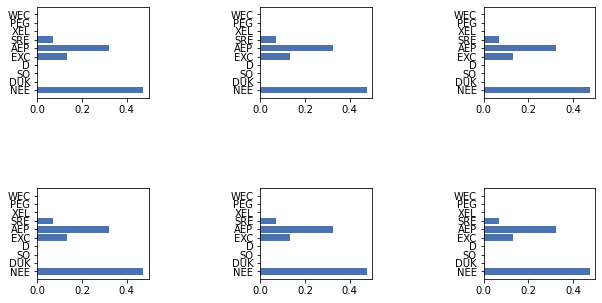

In [31]:

plt.figure(figsize=(10,5))
plt.subplot(2, 3, 1)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
plt.subplot(2, 3, 2)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)

plt.subplot(2, 3, 3)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
plt.subplot(2, 3, 4)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
plt.subplot(2, 3, 5)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
plt.subplot(2, 3, 6)
plt.barh(range(len(index)),Weight_Pred1 ,tick_label = index)

plt.subplots_adjust( 
                    wspace=1, 
                    hspace=1)
plt.show()  

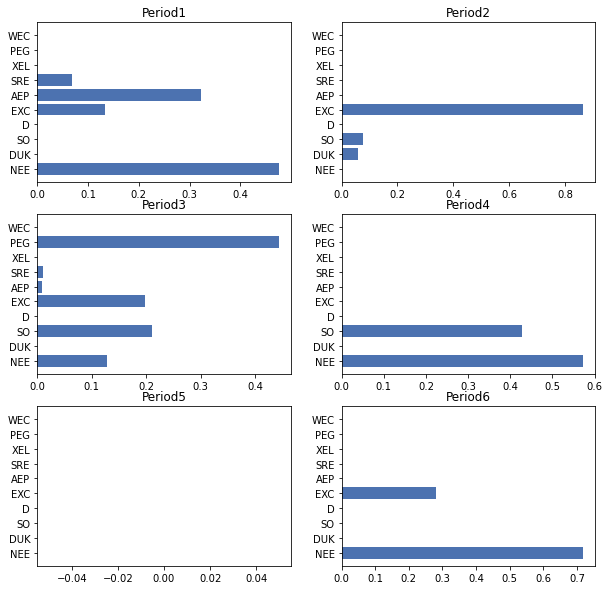

In [53]:

fig, ((axes1, axes2),(axes3,axes4),(axes5,axes6)) = plt.subplots(3,2, figsize=(10, 10))
axes1.barh(range(len(index)),Weight_Pred1 ,tick_label = index)
axes1.set_title('Period1')

axes2.barh(range(len(index)),Weight_Pred2 ,tick_label = index)
axes2.set_title('Period2')
axes3.barh(range(len(index)),Weight_Pred3 ,tick_label = index)
axes3.set_title('Period3')
axes4.barh(range(len(index)),Weight_Pred4 ,tick_label = index)
axes4.set_title('Period4')
axes5.barh(range(len(index)),Weight_Pred5 ,tick_label = index)
axes5.set_title('Period5')
axes6.barh(range(len(index)),Weight_Pred6 ,tick_label = index)
axes6.set_title('Period6')
plt.subplots_adjust( 
                    wspace=0.2, 
                    hspace=0.2)


plt.show()

In [ ]:

ax1 = fig.add_subplot(321)
ax1.barh(range(len(index)),Weight_Pred1 ,tick_label = index) 
  
ax2 = fig.add_subplot(322)  
ax2.barh(range(len(index)),Weight_Pred2 ,tick_label = index)
  
ax3 = fig.add_subplot(323)  
ax3.barh(range(len(index)),Weight_Pred3 ,tick_label = index)
  
ax4 = fig.add_subplot(324)  
ax4.barh(range(len(index)),Weight_Pred4 ,tick_label = index)  
  
ax5 = fig.add_subplot(325)  
ax5.barh(range(len(index)),Weight_Pred5 ,tick_label = index)  

ax6 = fig.add_subplot(326)  
ax6.barh(range(len(index)),Weight_Pred6 ,tick_label = index)

In [7]:
c={"p1" : Weight_Pred1,
   "p2":Weight_Pred2,
   "P3": Weight_Pred3,
   "p4": Weight_Pred4,
   "p5":Weight_Pred5,
   "p6":Weight_Pred6,
   "p7":Weight_Pred7}#将列表a，b转换成字典
data=pd.DataFrame(c)#将字典转换成为数据框
print(data)

         p1        p2        P3        p4  p5       p6        p7
0  0.475669  0.000000  0.127742  0.572986   0  0.71855  0.544301
1  0.000000  0.058459  0.000000  0.000000   0  0.00000  0.003009
2  0.000000  0.076356  0.210270  0.427014   0  0.00000  0.009889
3  0.000000  0.000000  0.000000  0.000000   0  0.00000  0.023362
4  0.132843  0.865185  0.197804  0.000000   0  0.28145  0.402236
5  0.322761  0.000000  0.009609  0.000000   0  0.00000  0.000000
6  0.068728  0.000000  0.011453  0.000000   0  0.00000  0.000000
7  0.000000  0.000000  0.000000  0.000000   0  0.00000  0.000000
8  0.000000  0.000000  0.443122  0.000000   0  0.00000  0.017203
9  0.000000  0.000000  0.000000  0.000000   0  0.00000  0.000000


In [8]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

plt.barh(range(len(num_list)), num_list,tick_label = name_list)
plt.show()

,p1,p2,P3,p4,p5,p6,p7
0,0.475669,0.000000,0.127742,0.572986,0,0.71855,0.544301
1,0.000000,0.058459,0.000000,0.000000,0,0.00000,0.003009
2,0.000000,0.076356,0.210270,0.427014,0,0.00000,0.009889
3,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.023362
4,0.132843,0.865185,0.197804,0.000000,0,0.28145,0.402236
5,0.322761,0.000000,0.009609,0.000000,0,0.00000,0.000000
6,0.068728,0.000000,0.011453,0.000000,0,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000
8,0.000000,0.000000,0.443122,0.000000,0,0.00000,0.017203
9,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000


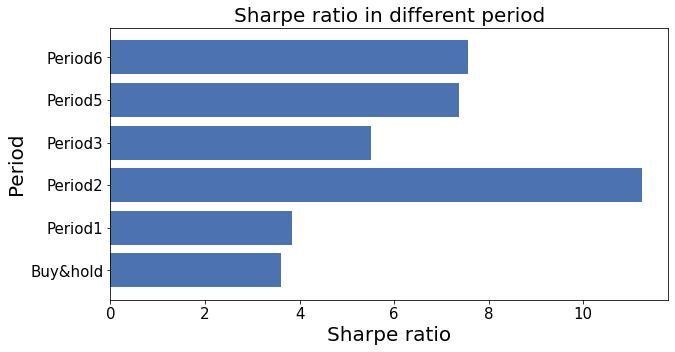

In [59]:
sharpe_ratio = [3.6, 3.83 , 11.24, 5.51, 7.38, 7.56]
index = ['Buy&hold','Period1','Period2','Period3','Period5','Period6']


plt.figure(figsize=(10,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Period', fontsize=20)
plt.xlabel('Sharpe ratio', fontsize=20)


plt.barh(range(len(index)),sharpe_ratio ,tick_label = index)


plt.title('Sharpe ratio in different period', fontsize=20)
plt.show()
